# Validación del modelo

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
datasets_dir = r'..\..\python-ml-course-master\datasets'

## Dividir el dataset en conjunto de entrenamiento y de testing

In [7]:
filepath = datasets_dir + os.sep + r"ads/Advertising.csv"
data = pd.read_csv(filepath)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
a = np.random.randn(len(data)) # Distribución normal de la longitud del dataset

(array([10., 19., 27., 37., 41., 33., 26.,  4.,  2.,  1.]),
 array([-2.31922561, -1.75586501, -1.1925044 , -0.62914379, -0.06578319,
         0.49757742,  1.06093802,  1.62429863,  2.18765923,  2.75101984,
         3.31438045]),
 <a list of 10 Patch objects>)

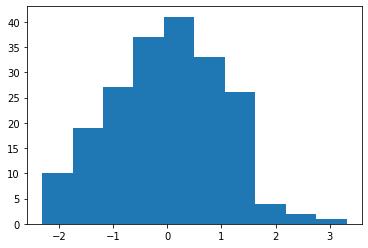

In [9]:
plt.hist(a)

In [10]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [12]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           6.92e-72
Time:                        16:48:33   Log-Likelihood:                -290.12
No. Observations:                 151   AIC:                             586.2
Df Residuals:                     148   BIC:                             595.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7124      0.350      7.745      0.000       2.020       3.404
TV             0.0444      0.002     27.558      0.000       0.041       0.048
Radio          0.2001      0.009     21.749      0.000       0.182       0.218
==============================================================================
Omnibus:                       59.051   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.933
Skew:                          -1.481   Prob(JB):                     3.85e-44
Kurtosis:                       7.796   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.7124 + TV * 0.0444 + Radio * 0.2001

In [14]:
sales_pred = lm.predict(testing)
sales_pred

0      20.501217
5      12.884106
9      12.111115
12     10.793659
13      8.565769
23     16.239051
24      8.002122
30     21.390846
31     11.211116
32      7.331802
36     23.337111
39     20.387890
49      8.026436
54     20.148912
56      8.659724
58     22.004821
60      5.489973
65      7.639503
71     10.453039
76      4.254579
79      9.407857
80     11.450149
82     10.120601
83     14.656513
85     14.979481
86     11.605789
88     11.738820
90      9.660756
98     24.050110
101    23.147209
104    20.160789
109    19.444327
110    14.387051
111    21.056703
113    16.148472
117     6.267447
126    10.843069
127     6.276223
134    12.076144
138     9.805882
139    19.713318
142    19.154146
143     8.501071
145     9.327062
160    13.999612
176    19.793615
183    24.096866
187    16.947239
190    12.691940
dtype: float64

In [16]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

155.954249866244

In [17]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.8412793866496622

In [20]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.12795729676050696

## Resumen y conclusiones

* Cuanto menor es pvalor mejor
* Cuanto más próximo a 1 es r2 y r2 ajustado mejor.
* Cuanto mayor es estadístico F mejor.
* Cuanto menor es el RSE y el error mejor.
* También se usó el VIF para la multicolinearidad, eliminándose del modelo aquellas con mayor VIF (>5)